# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [2]:
#Importamos las librerías para comenzar a explorar el dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

El proyecto tiene asociados tres sets de datos en formato json: dataset_es_train, dataset_es_test y dataset_es_dev. Vamos a abrirlos y ver qué contienen cada uno.

In [3]:
df_train = pd.read_json(r'C:\Users\dtaub\Documents\Data_Science\proyecto_3\dataset_es_train.json', lines=True)
df_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [4]:
df_test = pd.read_json(r'C:\Users\dtaub\Documents\Data_Science\proyecto_3\dataset_es_test.json', lines=True)
df_test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [5]:
df_dev = pd.read_json(r'C:\Users\dtaub\Documents\Data_Science\proyecto_3\dataset_es_dev.json', lines=True)
df_dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


Los dataframes están compuestos de ocho campos cada uno, con las siguientes características:

 - review_id: el id de la calificación
 - product_id: identificación del producto
 - reviewer_id: id del usuario
 - stars: la calificación en sí (numérica)
 - review_body: el texto de la crítica
 - review_title: título de la crítica
 - language: en qué lenguaje está escrita la crítica
 - product_category: categoría del producto
 
 Hay un dataframe para entrenamiento (train), uno para test y uno para desarrollar el modelo.

In [6]:
#Vamos a ver algunos detalles de los datasets
print("Tamaño del dataset train: "+str(len(df_train)))
print("Tamaño del dataset test: "+str(len(df_test)))
print("Tamaño del dataset dev: "+str(len(df_dev)))

Tamaño del dataset train: 200000
Tamaño del dataset test: 5000
Tamaño del dataset dev: 5000


El dataset de entrenamiento consta de 200 mil entradas, mientras que los otros dos sets tienen "apenas" 5.000. Es decir que en total hay aproximadamente un 95% del dataset para entrenamiento, y un 5% para evaluación, dividido en dos sets.

Vamos a ver cómo se distribuyen las calificaciones en el set de entrenamiento.

5    40000
4    40000
3    40000
2    40000
1    40000
Name: stars, dtype: int64


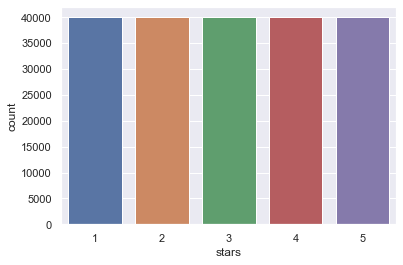

In [7]:
#Distribución de las calificaciones
sns.countplot(df_train.stars)
print(df_train.stars.value_counts())

3    1000
2    1000
5    1000
1    1000
4    1000
Name: stars, dtype: int64


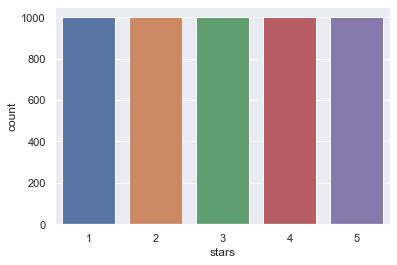

In [12]:
#Distribución de las calificaciones en test
sns.countplot(df_test.stars)
print(df_test.stars.value_counts())

3    1000
2    1000
5    1000
1    1000
4    1000
Name: stars, dtype: int64


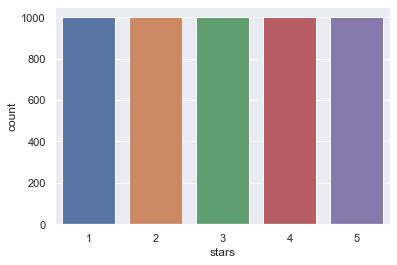

In [13]:
#Distribución de las calificaciones en dev
sns.countplot(df_dev.stars)
print(df_dev.stars.value_counts())

Las calificaciones van de 1 a 5 y están perfectamente divididas en igual número, 40 mil por cada una en train y 1.000 por cada una en test y dev.

### Valores positivos y negativos

El próximo paso va a ser intentar ver las generalidades de las calificaciones positivas y las negativas. Para ello, primero agruparemos las calificaciones con 1 y 2 estrellas en un dataset "negativo", y las de 4 y 5 estrellas en uno "positivo". Descartaremos las de 3 estrellas por considerarlas "neutrales" para este análisis, y más adelante veremos cómo abordarlas. Una vez hecho esto, se utilizará nltk y SpaCy para ver las frecuencias de palabras y analizar cuáles son los términos que más se utilizan en cada set.

In [9]:
negativas = df_train[(df_train.stars == 1)|(df_train.stars == 2)]
negativas.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
43595,es_0980758,product_es_0791592,reviewer_es_0352409,2,Esta muy bien en cuanto a medidas pero no ha d...,Bonito pero dudosa calidad,es,toy
46793,es_0512709,product_es_0755673,reviewer_es_0388760,2,dice que no se le quedan huellas y esta más su...,un dos justo...,es,wireless
9840,es_0008603,product_es_0097617,reviewer_es_0198142,1,Hice mi pedido el 25 de agosto y a fecha de ho...,NO COMPRAR NADA A ESTE VENDEDOR,es,beauty
27973,es_0991074,product_es_0494601,reviewer_es_0671492,1,Un mes esperando la entrega y aún no me ha lle...,"Mala compra, no recibo producto ni contestació...",es,home
5478,es_0347150,product_es_0113921,reviewer_es_0553566,1,Antes de comprar este producto hay que pensarl...,puro plastico,es,home


In [10]:
positivas = df_train[(df_train.stars == 4)|(df_train.stars == 5)]
positivas.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
154185,es_0652237,product_es_0843904,reviewer_es_0160160,4,Dire que adoro a mi camara :) tamaño adecuado ...,Para empezar en reflex muy buena camara,es,camera
156573,es_0265135,product_es_0931347,reviewer_es_0016993,4,Por el precio que tiene esperaba menos calidad...,Buena calidad,es,toy
193618,es_0835670,product_es_0955549,reviewer_es_0151486,5,No suelta ningún pelo. Muy buena calidad,Calidas 10,es,beauty
151969,es_0533131,product_es_0994253,reviewer_es_0456287,4,HE COMPRADO DOS EJEMPLARES. AMAZON ME HA COBRA...,AMAZON TIMO-----------------------------------...,es,other
153390,es_0963252,product_es_0999954,reviewer_es_0320568,4,"Al principio cuesta acostumbrarse, pero va bie...",Cumple con su cometido,es,drugstore


Ahora, generaremos una nueva columna con la review completa, uniendo "título" y "cuerpo".

In [16]:
negativas["review"] = negativas["review_title"] +" "+ negativas["review_body"]
negativas.head()

<ipython-input-16-5d3b451b7ad5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negativas["review"] = negativas["review_title"] +" "+ negativas["review_body"]


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,television Nevir Nada bueno se me fue ka panta...
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,Dinero tirado a la basura con esta compra Horr...
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,solo llega una unidad cuando te obligan a comp...
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,PRODUCTO NO RECIBIDO. No entro en descalificar...
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,Devuelto Llega tarde y co la talla equivocada


Ahora pasamos la columna "reviews" a minúsculas, eliminamos stop words y tokenizamos.

In [55]:
#Importamos nltk
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish')) - set(['no'])

In [18]:
negativas["review"] = negativas["review"].str.lower()

<ipython-input-18-626e2a32b394>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negativas["review"] = negativas["review"].str.lower()


In [20]:
#Importamos SpaCy
import spacy
nlp = spacy.load("es_core_news_md")

In [24]:
#importamos WordCloud
from wordcloud import WordCloud

Generamos la nube de palabras para las reviews negativas

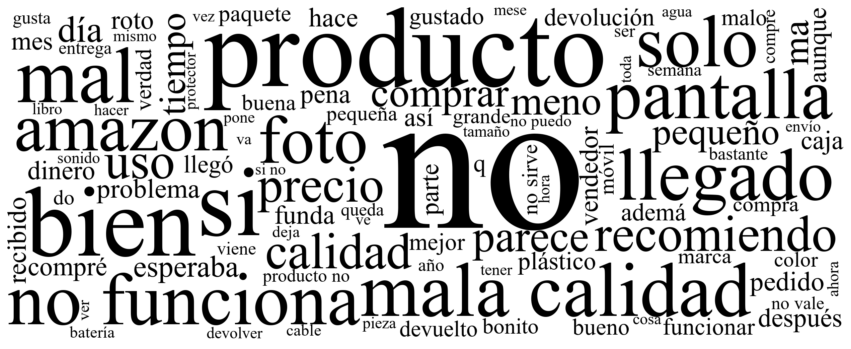

In [56]:
texto_neg = " ".join(review for review in negativas.review)  
font = "C:\\Windows\\Fonts\\Times New Roman\\times.ttf"
wordcloud = WordCloud(font_path = font, width = 2500, height = 1000, stopwords = stop_words,background_color = "white", 
                      color_func= lambda *args, **kwargs: "black", max_words = 100).generate(texto_neg)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  
plt.show()

Las palabras que priman son el "no", "producto", "no funciona", "mala calidad", "mal", "amazon", "pantalla", "precio", "esperaba", "problema", "devolución". Además, cabe destacar que una expresión muy utilizada en las reviews negativas es la conjunción "si bien", por eso aparecen estas palabras con tanto peso en la nube.

Veremos qué ocurre con la nube de palabras para las reviews "positivas".

In [47]:
positivas["review"] = positivas["review_title"] +" "+ positivas["review_body"]
positivas["review"] = positivas["review"].str.lower()

<ipython-input-47-3f306ccc075e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positivas["review"] = positivas["review_title"] +" "+ positivas["review_body"]
<ipython-input-47-3f306ccc075e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positivas["review"] = positivas["review"].str.lower()


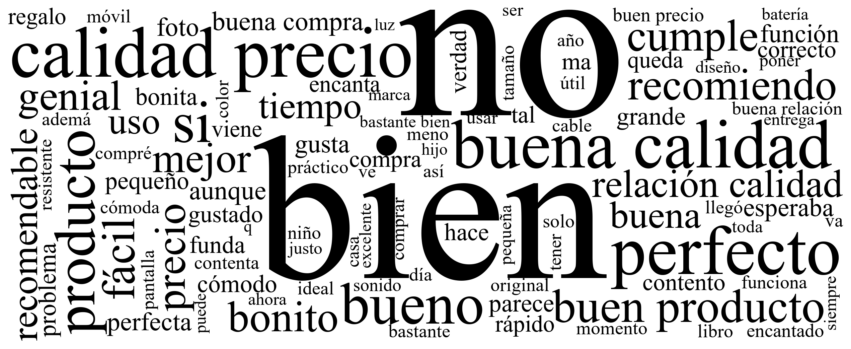

In [59]:
texto_pos = " ".join(review for review in positivas.review)  
wordcloud = WordCloud(font_path = font, width = 2500, height = 1000, stopwords = stop_words,background_color = "white", 
                      color_func= lambda *args, **kwargs: "black", max_words = 100).generate(texto_pos)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  
plt.show()

Aunque "si" y "no" aparecen indistintamente en ambas nubes de palabras, en las calificaciones positivas priman las expresiones "bien", "buen producto", "perfecto", "calidad", "precio", "bueno", "perfecta", "genial", "bonito", y otros términos con connotaciones muy positivas. 